In [4]:
import numpy as np
from datascience import *
import matplotlib.pylab as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
tamanos_continentes = make_array(12, 17, 6, 9, 7)

In [7]:
np.sort(tamanos_continentes)

array([ 6,  7,  9, 12, 17])

- El  percentil 80 es un valor de la lista. El 80% de los valores son menores o iguales a él, y es valor mas pequeño para el cual es cierto.

- El percentil 70 es el valor mas pequeno de la coleccion que es al menos tan grande como el 70% de los elementos. El 70 porciento de los 5 elementos es 3.5 elementos, por lo que el percentil 70, es el cuarto elemento de la lista. Es decir 12



# Función percentil 

```python
percentil(percentil_numero, coleeccion de elementos)
```

In [4]:
percentile(70, tamanos_continentes)

12

In [8]:
percentile(80, tamanos_continentes)

12

In [9]:
tbl = Table.read_table("CountriesWorld.csv")
tbl = tbl.select("Country","Population", "Area (sq. mi.)")
tbl.num_rows

227

In [12]:
tbl

Country,Population,Area (sq. mi.)
Afghanistan,31056997,647500
Albania,3581655,28748
Algeria,32930091,2381740
American Samoa,57794,199
Andorra,71201,468
Angola,12127071,1246700
Anguilla,13477,102
Antigua & Barbuda,69108,443
Argentina,39921833,2766890
Armenia,2976372,29800


In [32]:
percentile(20, tbl.column("Population"))

221736

In [33]:
tbl.where("Population", are.below_or_equal_to(4786994)).num_rows
tbl

Country,Population,Area (sq. mi.)
Afghanistan,31056997,647500
Albania,3581655,28748
Algeria,32930091,2381740
American Samoa,57794,199
Andorra,71201,468
Angola,12127071,1246700
Anguilla,13477,102
Antigua & Barbuda,69108,443
Argentina,39921833,2766890
Armenia,2976372,29800


(0.0, 1000.0)

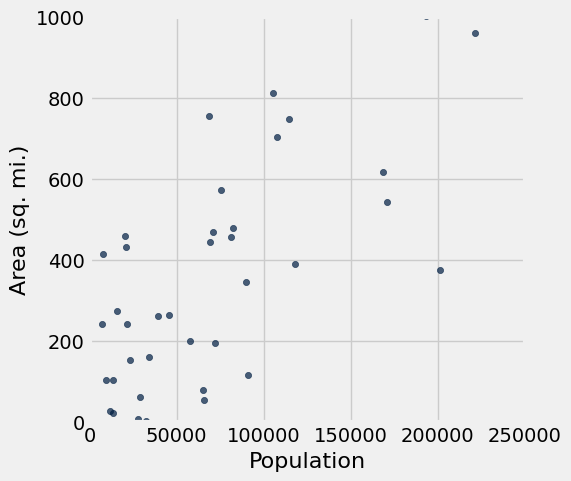

In [34]:
tbl.scatter("Population", "Area (sq. mi.)")
plots.xlim(0, 0.25E6)
plots.ylim(0, 1E3)

# **Percentil**

El **percentil** es una medida estadística que indica la posición de un valor dentro de un conjunto de datos ordenados. Formalmente, el percentil $ P_k $ de orden $ k $ (donde $ k $ es un número entre 0 y 100) se define como el valor $ x_k $ que cumple con las siguientes condiciones:

1. **Porcentaje de datos menores o iguales**: Al menos el $k\%$ de los datos son menores o iguales a $x_k$.
2. **Porcentaje de datos mayores o iguales**: Al menos el $(100 - k)\%$ de los datos son mayores o iguales a $x_k$.

## **Fórmula General para Calcular un Percentil**
Si tenemos un conjunto de datos ordenados de tamaño $n$, el índice $i$ correspondiente al percentil $k$ se calcula como:

\begin{equation}
i = \frac{k}{100} \times n
\end{equation}

### **Reglas para determinar el percentil \( P_k \):**
- Si $i$ es un número entero y n es impar,  el percentil es el promedio entre el valor en la posición $i$ y el valor en la posición $i+1$ redondea hacia arriba.
- Si $i$ no es un número entero, se redondea hacia arriba y se toma el valor en la posición resultante.

## **Ejemplo Práctico**
Supongamos que tenemos los siguientes datos ordenados:  
\[ 2, 5, 7, 10, 15, 18, 21, 25, 30, 35 \] (10 datos, $n = 10$)

Queremos encontrar el **percentil 40** ($P_{40}$):

\begin{equation}
i = \frac{40}{100} \times 10 = 4
\end{equation}

Es decir, 10 es el numero 4 de la lista que representa que el 40%  de los datos son menores o iguales a el. Mientras el 60% son mayores o iguales que él.

In [35]:
numbers=make_array(2, 5, 7, 10, 15, 18, 21, 25, 30, 35 )

In [36]:
percentile(40, numbers)


10

In [38]:
percentile(55, numbers)

18

In [39]:
numbers=make_array(2, 5, 7, 10, 15, 18, 21, 25, 30, 35,50 )
90*11/100

9.9

In [40]:
percentile(90, numbers)

35

In [41]:
# Tabla con alturas promedio masculinas por país (en cm)
tbl = Table().with_columns(
    "País",       ["Países Bajos", "México", "Japón", "India", "Perú", "Sudán", "Brasil"],
    "Altura_cm",  [183,             170,      171,     167,     165,    177,     173]
)

tbl

País,Altura_cm
Países Bajos,183
México,170
Japón,171
India,167
Perú,165
Sudán,177
Brasil,173


In [42]:
percentile(50,tbl.column("Altura_cm"))

171

In [43]:
tbl.sort("Altura_cm")

País,Altura_cm
Perú,165
India,167
México,170
Japón,171
Brasil,173
Sudán,177
Países Bajos,183


Miremos el siguiente dataset de pinguinos:

Allison Marie Horst
Alison Hill
Kristen Gorman (investigadora que recolectó los datos en la Antártida)

In [49]:
p = Table().read_table("pinguinos.csv")
p 

Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18,195,3250,Female
4,Adelie,Torgersen,36.7,19.3,193,3450,Female
5,Adelie,Torgersen,39.3,20.6,190,3650,Male
6,Adelie,Torgersen,38.9,17.8,181,3625,Female
7,Adelie,Torgersen,39.2,19.6,195,4675,Male
12,Adelie,Torgersen,41.1,17.6,182,3200,Female
13,Adelie,Torgersen,38.6,21.2,191,3800,Male
14,Adelie,Torgersen,34.6,21.1,198,4400,Male


In [50]:
percentile(50,p.column("bill_length_mm"))

44.5

In [51]:
np.max(p.column("bill_length_mm"))

59.600000000000001

In [52]:
np.min(p.column("bill_length_mm"))

32.100000000000001

# Cuartil

Los **cuartiles** son valores que dividen un conjunto de datos ordenados en **cuatro partes iguales**, cada una representando el **25%** de los datos. Son un caso especial de los **percentiles**, donde los valores clave corresponden a los percentiles **25, 50 y 75**.

Los cuartiles principales son:

1. **Primer cuartil (Q₁ o P₂₅):** Es el valor que separa el **25%** de los datos inferiores del resto. Es equivalente al **percentil 25**.
2. **Segundo cuartil (Q₂ o P₅₀):** Es el valor que separa el **50%** de los datos inferiores del resto. Es igual a la **mediana** o **percentil 50**.
3. **Tercer cuartil (Q₃ o P₇₅):** Es el valor que separa el **75%** de los datos inferiores del resto. Es equivalente al **percentil 75**.


In [53]:
picos=p.column("bill_length_mm")
print(f"Primer cuartil: {percentile(25, picos)}")
print(f"Segundo cuartil: {percentile(50, picos)}")
print(f"Tercero cuartil: {percentile(75, picos)}")
print(f"cuarto cuartil: {percentile(100, picos)}")

Primer cuartil: 39.5
Segundo cuartil: 44.5
Tercero cuartil: 48.6
cuarto cuartil: 59.6


In [54]:
def percentil_(number, array):
    nn = len(array)
    n = nn*number/100
    array = np.sort(array)
    
    if(n%2==0):
        return array[int(n)]
    else:
        return array[int(np.ceil(n))]

In [55]:
np.sort(picos)[90]

11

In [56]:
np.sort(picos)[90]

39.600000000000001

In [57]:
percentil_(50, scores)

16

# Bootstrap

In [58]:
penguins=tbl = Table.read_table("pinguinos.csv")
penguins

Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18,195,3250,Female
4,Adelie,Torgersen,36.7,19.3,193,3450,Female
5,Adelie,Torgersen,39.3,20.6,190,3650,Male
6,Adelie,Torgersen,38.9,17.8,181,3625,Female
7,Adelie,Torgersen,39.2,19.6,195,4675,Male
12,Adelie,Torgersen,41.1,17.6,182,3200,Female
13,Adelie,Torgersen,38.6,21.2,191,3800,Male
14,Adelie,Torgersen,34.6,21.1,198,4400,Male


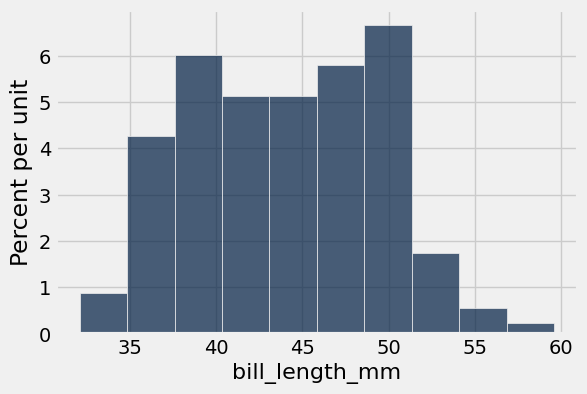

In [59]:
penguins.select("bill_length_mm").hist()

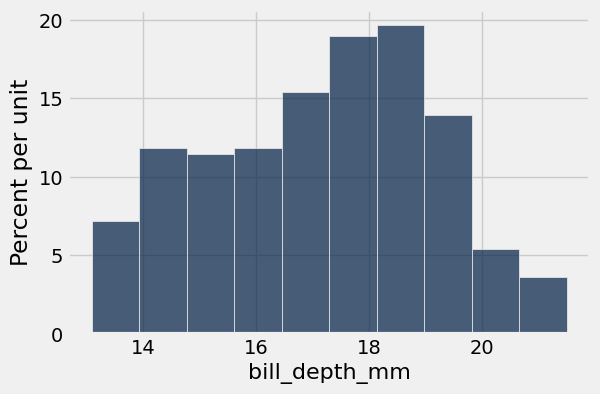

In [60]:
penguins.select("bill_depth_mm").hist()

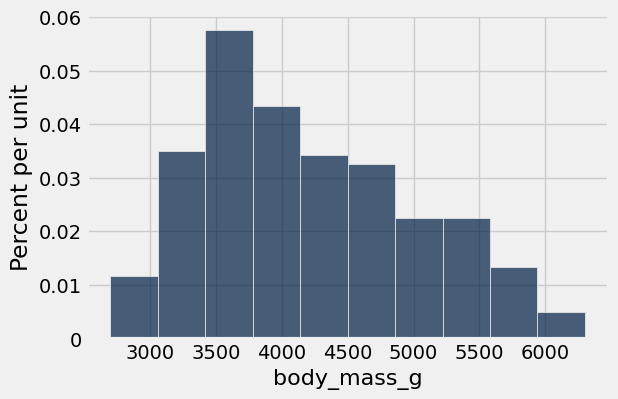

In [61]:
penguins.select("body_mass_g").hist()

In [63]:
est_median = percentile(50, penguins.column("body_mass_g"))
mediana =  est_median
mediana

4050.0

In [64]:
penguins.percentile(50)

Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
172,Chinstrap,Dream,44.5,17.3,197,4050,Male


In [65]:
penguins

Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18,195,3250,Female
4,Adelie,Torgersen,36.7,19.3,193,3450,Female
5,Adelie,Torgersen,39.3,20.6,190,3650,Male
6,Adelie,Torgersen,38.9,17.8,181,3625,Female
7,Adelie,Torgersen,39.2,19.6,195,4675,Male
12,Adelie,Torgersen,41.1,17.6,182,3200,Female
13,Adelie,Torgersen,38.6,21.2,191,3800,Male
14,Adelie,Torgersen,34.6,21.1,198,4400,Male


# Una muetra aleatoria y una estimación

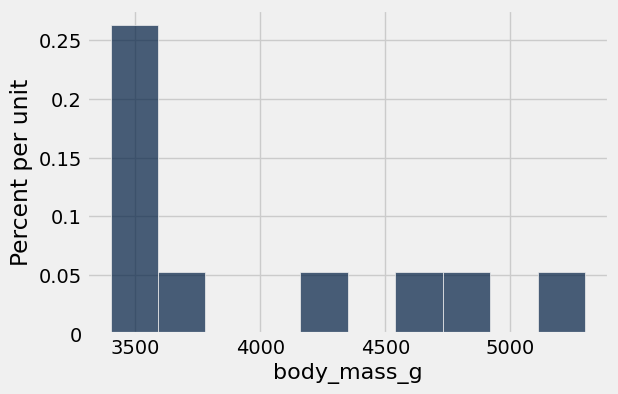

In [69]:
our_sample = penguins.select("body_mass_g").sample(10, with_replacement=False)
our_sample.select('body_mass_g').hist()

In [73]:
est_median = percentile(50, our_sample.column('body_mass_g'))
est_median

3550.0

In [74]:
percentile(50, penguins.column("body_mass_g"))

4050.0

# El Bootstrap: Remuestreo del número de muestra



- Trate la muestra original como si fuera la población.
- Extraiga de la muestra, al azar con reemplazo, el mismo número de veces que el tamaño original de la muestra.
![img](https://inferentialthinking.com/_images/582b7f0ad963cb57dec2cf5cf68937059bd2b3150ba74bc041a85a4ed2ff6aaf.png)

In [75]:
bstrap_medians = make_array()
for i in range(0, 1000):
    our_sample = penguins.select("body_mass_g").sample(100, with_replacement=False)
    #our_sample.select('Total Compensation').hist(bins=sf_bins)
    est_median = percentile(50, our_sample.column('body_mass_g'))
    bstrap_medians=np.append(bstrap_medians , est_median)

In [76]:
bstrap_medians

array([ 4100.,  4050.,  4150.,  4200.,  4150.,  3950.,  3950.,  3900.,
        4075.,  4050.,  4150.,  3950.,  4050.,  4075.,  4000.,  3950.,
        4150.,  3950.,  3950.,  4000.,  4075.,  4050.,  4200.,  3950.,
        4000.,  3950.,  4000.,  4150.,  3950.,  3950.,  4000.,  4100.,
        3950.,  3950.,  3950.,  4300.,  4000.,  4150.,  3950.,  3950.,
        4150.,  3950.,  4050.,  4000.,  3900.,  4050.,  3950.,  3950.,
        4150.,  4000.,  4050.,  3950.,  4050.,  4050.,  3950.,  4050.,
        4100.,  4000.,  4050.,  4150.,  4200.,  3950.,  4100.,  3975.,
        3950.,  4000.,  4275.,  4150.,  3800.,  4000.,  4150.,  3900.,
        3900.,  3950.,  4050.,  4150.,  3900.,  4150.,  4050.,  4050.,
        4000.,  3900.,  3900.,  4100.,  4050.,  4050.,  3950.,  3975.,
        4200.,  4100.,  4000.,  4050.,  4050.,  4150.,  3800.,  4150.,
        3950.,  3950.,  4050.,  4100.,  4150.,  4150.,  4000.,  4050.,
        4050.,  4100.,  3800.,  4000.,  3950.,  3950.,  4075.,  4050.,
      

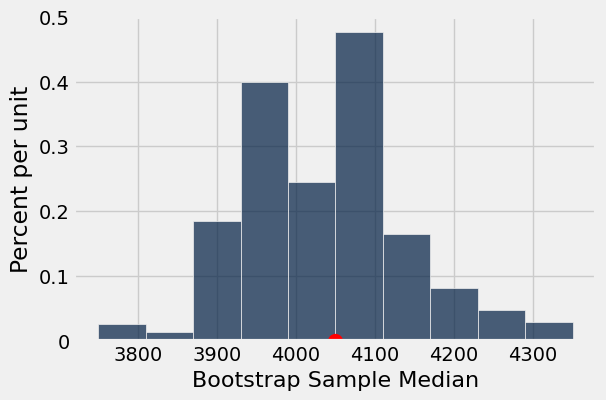

In [77]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
#median_bins=np.arange(120000, 160000, 2000)
resampled_medians.hist()
plots.plot(mediana, 0, "ro",ms=10);

In [78]:
np.mean(bstrap_medians)

4029.25

In [79]:
mediana

4050.0

# ¿Las estimaciones capturan el parametro?

Calculemos El intervalo "medio del 95 %" de las estimaciones

In [84]:
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)
print(left, right)

3875.0 4250.0


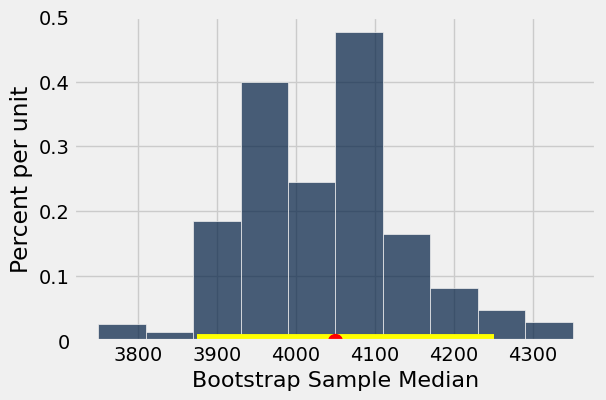

In [86]:
resampled_medians.hist()
# Plotting parameters; you can ignore this code
plots.plot([left, right], [0, 0], color='yellow', lw=10)
#plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);
plots.plot(mediana, 0, "ro",ms=10);

Calculemos El intervalo "medio del 95 %" de las estimaciones capturó el parámetro en nuestro ejemplo.

In [87]:
def bootstrap_median(original_sample, num_repetitions):
    medians = make_array()
    for i in np.arange(num_repetitions):
        new_bstrap_sample = original_sample.sample()
        new_bstrap_median = percentile(50, new_bstrap_sample.column('body_mass_g'))
        medians = np.append(medians, new_bstrap_median)
    return medians

In [95]:
# THE BIG SIMULATION: This one takes several minutes.

# Generate 100 intervals and put the endpoints in the table intervals
left_ends = make_array()
right_ends = make_array()

for i in np.arange(100):
   # print(i)
    original_sample = penguins.select("body_mass_g").sample(100, with_replacement=False)
   # original_sample = sf2019.sample(500, with_replacement=False)
    medians = bootstrap_median(original_sample, 100)#
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)    

In [96]:
intervals

Left,Right
3900,4450
3900,4400
3750,4150
3950,4300
3725,4050
3800,4250
3950,4500
3800,4300
4150,4550
3800,4300


In [97]:
intervals.where(
    'Left', are.below(mediana)).where(
    'Right', are.above(mediana)).num_rows

91

In [98]:
left_values=intervals.column(0)
right_values=intervals.column(1)
interleaved_values = [val for pair in zip(left_values, right_values) for val in pair]
pop_median_interleaved = list(range(1, len(interleaved_values) + 1))  # Ajustar posiciones

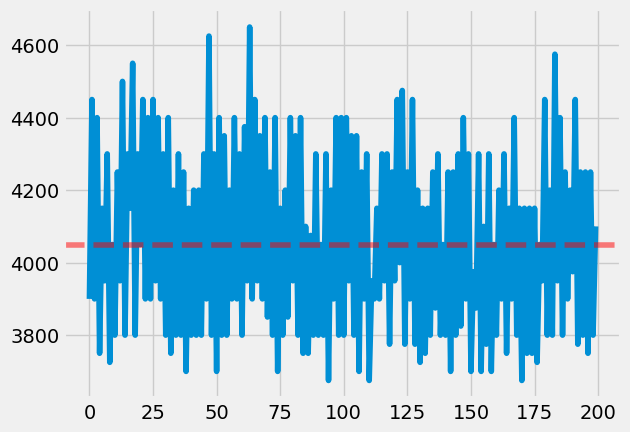

In [99]:
plots.plot(interleaved_values)
plots.axhline(y=mediana, color='red', linestyle='--', alpha=0.5)

# Estimaciones de los parametros

- Dibuja una gran muestra aleatoria de la población.
- Arranca tu muestra aleatoria y obtén una estimación de la nueva muestra aleatoria.
- Repita el paso de arranque anterior miles de veces y obtenga miles de estimaciones.
- Elija el intervalo "95 % medio" de todas las estimaciones.


In [26]:
np.sort(score.column("Midterm"))[306]

22

In [93]:
sample_proportions(100, make_array(0.4, 0.5))

array([ 0.4,  0.6])

In [94]:
sample_proportions?

Signature: sample_proportions(sample_size, probabilities)
Docstring:
Return the proportion of random draws for each outcome in a distribution.

This function is similar to np.random.multinomial, but returns proportions
instead of counts.

Args:
    ``sample_size``: The size of the sample to draw from the distribution.

    ``probabilities``: An array of probabilities that forms a distribution.

Returns:
    An array with the same length as ``probability`` that sums to 1.
File:      ~/anaconda3/envs/data8/lib/python3.10/site-packages/datascience/util.py
Type:      function